In [4]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt


# Caminho da imagem
image_path = 'dpi-ufv.jpg'  # Substituir pelo caminho correto


In [5]:
#5 Utilize a função drawKeypoints para desenhar os keypoints na imagem.
def draw_keypoints(image, keypoints, title="Keypoints"):
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(6,6))
    plt.imshow(image_with_keypoints, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [6]:
# Carregar a imagem
def load_image(image_path):
    
    if image_path is None or image_path == "":
        raise ValueError("Caminho da imagem invalido")
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Erro ao carregar a imagem. Verifique o caminho!")
        
    return image

image = load_image(image_path)

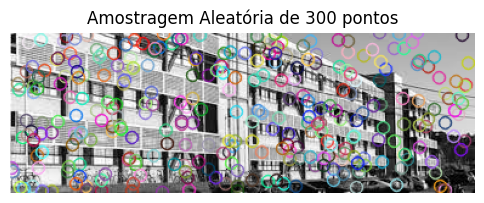

In [7]:
# 1.1 Amostragem Aleatória de 300 pontos
def random_sampling(image, num_points=300):
    
    height, width = image.shape
    keypoints = [cv2.KeyPoint(random.randint(0, width-1), random.randint(0, height-1), 10) for _ in range(num_points)]
    
    return keypoints

random_sampling_keypoints = random_sampling(image)

draw_keypoints(image, random_sampling_keypoints, 'Amostragem Aleatória de 300 pontos')

    

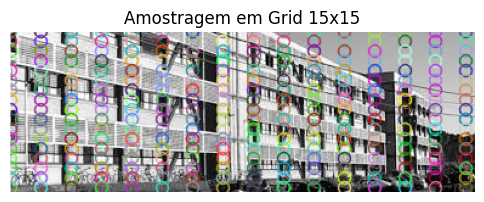

In [8]:
# 1.2 Amostragem em Grid 15x15
def grid_sampling(image, grid_size=(15, 15)):
    height, width = image.shape
    step_x, step_y = width // grid_size[0], height // grid_size[1]
    keypoints = [cv2.KeyPoint(x, y, 10) for x in range(0, width, step_x) for y in range(0, height, step_y)]
    return keypoints

grid_sampling_keypoints = grid_sampling(image)

draw_keypoints(image, grid_sampling_keypoints, 'Amostragem em Grid 15x15')



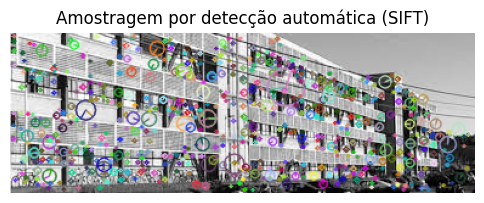

In [9]:
# 1.3 Amostragem por detecção automática (SIFT)
def sift_keypoints(image):
    sift = cv2.SIFT_create()
    keypoints = sift.detect(image, None)
    return keypoints

sift_automatic_keypoints = sift_keypoints(image)

draw_keypoints(image, sift_automatic_keypoints, 'Amostragem por detecção automática (SIFT)')

In [10]:
# 4. Obter descritores para os keypoints
def compute_descriptors(image, keypoints):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(image, keypoints)
    return keypoints, descriptors

Método: Random Sampling
Tamanho do código do primeiro keypoint: 128
Código do primeiro keypoint: 
[  1.   9.  14.   0.   0.   4.  24.   4.   0.   5.  10.   0.   0.   1.
  23.   7.   0.   1.   3.   0.   0.   1.  22.   4.   0.   0.   0.   0.
   0.   0.   5.   0.  39. 105.  69.   3.   3.  27.  60.   5.   4.  26.
  47.   1.   0.  18.  84.   5.   0.  17.  46.   0.   0.  15.  65.   2.
   0.   3.  10.   0.   0.   2.  12.   0. 126. 137.  88.   4.   3.  72.
  97.  61.  26.  31.  45.   1.   0.  12.  72.  19.   0.  10.  36.   0.
   0.  12.  72.   3.   0.   2.   7.   0.   0.   2.  15.   0.  53. 137.
 137.   9.  18. 128. 113.  24.   7. 137. 137.  16.  13.  36.  27.   7.
   0.  81. 137.  67.   2.   4.  25.   2.   0.  14.  48.  10.   0.   1.
   5.   0.]



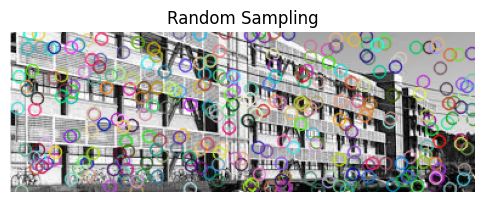

Método: Grid Sampling
Tamanho do código do primeiro keypoint: 128
Código do primeiro keypoint: 
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  15.   8.
   9.   4.   0.   0.   0.   1.  69.  41.  38.   6.   1.   1.   0.   2.
   0.   8.  17.   0.   1.   2.   3.   1.   0.   0.   0.   0.   0.   0.
   0.   0.  99.  31.  27.   9.   2.  14.  41.  34. 139. 139. 139.  53.
  35.  35.  74. 101.   9.  95. 139.  25.   5.   8.  12.   8.   0.   0.
   0.   0.   0.   0.   0.   0.  20.  26.  41.   4.   1.  16.  67.  19.
  85. 126. 139.  35.  91. 113. 139.  71.  27.  64. 131.  16.  24.  48.
  84.  33.]



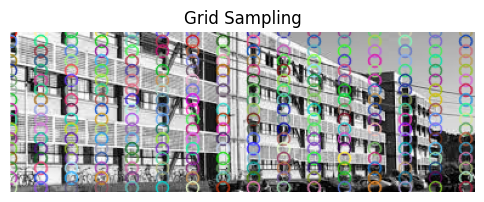

Método: SIFT Keypoints
Tamanho do código do primeiro keypoint: 128
Código do primeiro keypoint: 
[  0.   0.   2.   4.   2.   0.   0.   0.  14.  22. 112. 126.  65.   0.
   0.   0. 123. 143. 109.  19.   7.   0.   0.   1.  57.  99.  14.   0.
   0.   1.   1.   2.   0.   0.   0.   1.   8.   0.   0.   0.  55.   3.
   1.  17. 143.   1.   0.   2. 143.  38.   1.   3.  29.   0.   0.   7.
  80.  98.  15.   1.   0.   0.   0.   5.   0.   0.   0.   0.   8.   0.
   0.   0.  58.   0.   0.   2. 143.   3.   0.   3. 143.  14.   0.   0.
  28.   1.   0.  11.  78.  55.   4.   0.   0.   1.   0.   7.   0.   0.
   0.   0.   4.   2.   1.   0.  30.   0.   0.   0. 113.  78.  37.  16.
 143.   3.   0.   0.  13.  15.  36.  60.  28.  29.   3.   0.   1.   2.
  10.  24.]



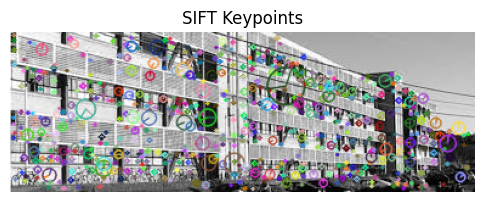

In [14]:
types_of_keypoints = {
    "Random Sampling": random_sampling(image),
    "Grid Sampling": grid_sampling(image),
    "SIFT Keypoints": sift_keypoints(image)
}

# Mostrar keypoints e calcular descritores
for method, keypoints in types_of_keypoints.items():
    keypoints, descriptors = compute_descriptors(image, keypoints)
    print(f"Método: {method}")
    # 4.1 mostre o tamanho do código gerado para o primeiro keypoint
    print(f"Tamanho do código do primeiro keypoint: {descriptors.shape[1]}")
    # 4.2 mostre o código gerado para o primeiro keypoint.
    print(f"Código do primeiro keypoint: \n{descriptors[0]}\n")
    draw_keypoints(image, keypoints, method)
